## Imports

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
import os
import pathlib

## Creating and Rendering Landmarks using Mediapipe

mediapipe.solutions.holistic

mediapipe.solutions.drawing_utils

In [3]:
mp_holistic = mp.solutions.holistic # This is the Holistic Model which will create landmarks

In [4]:
# mp_holistic??

In [5]:
mp_drawing = mp.solutions.drawing_utils # This will render the landmarks created by the holistic Model

In [6]:
# mp_drawing??

### Setting Up Mediapipe

* Create a function that will
    * Convert BGR to RGB
    * Make image unwriteable using image.flags.writable = False
    * Process the image (create landmarks using mp.solutions.holistic)
    * Make the image writeable
    * convert color back to BGR


* Create a function that will render the landmarks
* Use the above functions with OpenCV to create landmarks on realtime data
    * Set min_detection_confidence and min_tracking_confidence of holistic model

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    image.flags.writeable = False # Make is so that the image is no longer writeable [this is done so that landmarking process is fast]
    results = model.process(image) # Make landmark predictions
    image.flags.writeable = True # Make the image writable again
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # Conver RGB to BGR
    return image, results
    

FACE_CONNECTIONS has been replaced by FACEMESH_TISSELATION.

We can also use FACEMESH_CONTOURS if we just want the outline of the face

In [8]:
def render_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draws connections Face Landmarks
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draws outline of Face
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draws connections of Landmarks of Pose
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draws connections of Right Hand Landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draws connections of Left Hand Landmarks

In [9]:
# mp_drawing.draw_landmarks??

In [10]:
def render_styled_landmarks(image, results):
    
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draws connections Face Landmarks
    
    # Draws outline of Face
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              # landmark_drawing_spec
                             mp_drawing.DrawingSpec(color =(80,110,10), # BGR
                                                    thickness = 1,
                                                    circle_radius =1
                                                    ),
                              # connection_drawing_spec
                              mp_drawing.DrawingSpec(color = (80,255,121), # BGR
                                                    thickness =1,
                                                     circle_radius = 1
                                                    )
                             )
    
    # Draws connections of Landmarks of Pose
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color =(80,11,10), # BGR
                                                    thickness = 2,
                                                    circle_radius =1
                                                    ),
                              # connection_drawing_spec
                              mp_drawing.DrawingSpec(color = (0,0,204), # BGR
                                                    thickness =2,
                                                     circle_radius = 1
                                                    )
                             )
    
    # Draws connections of Right Hand Landmarks
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color =(255,255,102), # BGR
                                                    thickness = 2,
                                                    circle_radius =1
                                                    ),
                              # connection_drawing_spec
                              mp_drawing.DrawingSpec(color = (127,0,255), # BGR
                                                    thickness =2,
                                                     circle_radius = 1
                                                    )
                             )
    
    # Draws connections of Left Hand Landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color =(51,255,51), # BGR
                                                    thickness = 2,
                                                    circle_radius =1
                                                    ),
                              # connection_drawing_spec
                              mp_drawing.DrawingSpec(color = (204,0,102), # BGR
                                                    thickness =2,
                                                     circle_radius = 1
                                                    )
                             )

### OpenCV

In [10]:
cap = cv2.VideoCapture(0)
holistic = mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5)

while cap.isOpened():
    # Reed from feed
    ret, frame = cap.read()
    
    # Detect Landmarks 
    image, results = mediapipe_detection(frame,holistic)
    print(results)

    render_styled_landmarks(image, results)
    # Show feed
    cv2.imshow('Feed', image)

    # Exit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


C:\Mayank\PycharmProjects\TF_GPU\venv\lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Landmarks will only be created for objects like hand if they are still inside the frame.

Even if they were inside the camera's vision and landmarks were created,  while quitting if they are outside ie not in the vision of camera then landmarks will be deleted.

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
results.face_landmarks # A dictionary of landmarks x,y,z locations

landmark {
  x: 0.48273006081581116
  y: 0.548945426940918
  z: -0.024524850770831108
}
landmark {
  x: 0.48413655161857605
  y: 0.5182408094406128
  z: -0.04017486423254013
}
landmark {
  x: 0.48255375027656555
  y: 0.5287830233573914
  z: -0.022059882059693336
}
landmark {
  x: 0.4767289161682129
  y: 0.4885820150375366
  z: -0.028888722881674767
}
landmark {
  x: 0.4843973219394684
  y: 0.5086214542388916
  z: -0.04223604500293732
}
landmark {
  x: 0.48397254943847656
  y: 0.49665072560310364
  z: -0.03846963867545128
}
landmark {
  x: 0.48245105147361755
  y: 0.46909379959106445
  z: -0.01633681356906891
}
landmark {
  x: 0.42388638854026794
  y: 0.46910935640335083
  z: 0.00849378202110529
}
landmark {
  x: 0.4822452664375305
  y: 0.44954174757003784
  z: -0.010413575917482376
}
landmark {
  x: 0.4825800359249115
  y: 0.4371388554573059
  z: -0.011193972080945969
}
landmark {
  x: 0.48203256726264954
  y: 0.39026546478271484
  z: 0.00024352531181648374
}
landmark {
  x: 0.48262676

In [14]:
results.face_landmarks.landmark # gives list of landmark x,y,z locations

[x: 0.48273006081581116
y: 0.548945426940918
z: -0.024524850770831108
, x: 0.48413655161857605
y: 0.5182408094406128
z: -0.04017486423254013
, x: 0.48255375027656555
y: 0.5287830233573914
z: -0.022059882059693336
, x: 0.4767289161682129
y: 0.4885820150375366
z: -0.028888722881674767
, x: 0.4843973219394684
y: 0.5086214542388916
z: -0.04223604500293732
, x: 0.48397254943847656
y: 0.49665072560310364
z: -0.03846963867545128
, x: 0.48245105147361755
y: 0.46909379959106445
z: -0.01633681356906891
, x: 0.42388638854026794
y: 0.46910935640335083
z: 0.00849378202110529
, x: 0.4822452664375305
y: 0.44954174757003784
z: -0.010413575917482376
, x: 0.4825800359249115
y: 0.4371388554573059
z: -0.011193972080945969
, x: 0.48203256726264954
y: 0.39026546478271484
z: 0.00024352531181648374
, x: 0.4826267659664154
y: 0.5533043742179871
z: -0.023823978379368782
, x: 0.4823508858680725
y: 0.5567024350166321
z: -0.021410426124930382
, x: 0.4819680452346802
y: 0.5581920146942139
z: -0.018153434619307518
,

In [15]:
len(results.face_landmarks.landmark)

468

In [16]:
results.right_hand_landmarks

In [17]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

     Total no of landmarks for a face are 468
     Total no of landmarks for pose are 33 
     Total no of landmarks for right hand are 21
     Total no of landmarks for left hand are 21

#### Rendering landmarks on last frame

In [18]:
render_landmarks(frame,results)

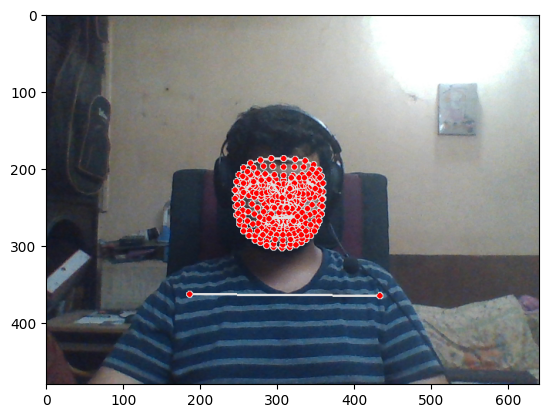

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Extract The Keypoints Values

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    a = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(a)

In [21]:
pose[:5]

[array([ 0.47900206,  0.49631506, -0.95688045,  0.9999854 ]),
 array([ 0.49794117,  0.4427706 , -0.89632273,  0.99996221]),
 array([ 0.51285756,  0.44277421, -0.89630187,  0.9999696 ]),
 array([ 0.52422267,  0.44344792, -0.896622  ,  0.99996054]),
 array([ 0.45210782,  0.44624954, -0.90267456,  0.99995613])]

In [22]:
pose = np.array(pose)

In [23]:
pose.shape

(33, 4)

Let's simplify this and also add error handelling so that if there are no landmarks there will be zeros inplace of the x,y,z co-ordinates

In [24]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

> * For Pose the value of np.zeros is 33*4 because there are 33 keypoints/landmarks in pose_landmark and each of the landmark has 4 values
> * For Face the value of np.zeros is 468*3 because there are 468 keypoints/landmarks in pose_landmark and each of the landmark has 3 values
> * For Left Hand the value of np.zeros is 21*3 because there are 21 keypoints/landmarks in pose_landmark and each of the landmark has 3 values
> * For Right Hand the value of np.zeros is 21*3 because there are 21 keypoints/landmarks in pose_landmark and each of the landmark has 3 values

In [25]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Lets functionize this

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face, lh, rh])

In [10]:
extract_keypoints(results)

NameError: name 'results' is not defined

In [ ]:
extract_keypoints(results).shape

In [29]:
468*3+33*4+21*3+21*3

1662

## Folder Setup for Data Collection

In [46]:
# exported data path
Data_Path = os.path.join('MP_Data')

# what we are going to detect
actions = np.array(['blank','hello', 'thanks', 'iloveyou'])

# How many videos for each action 
no_sequence = 60
# How many Frames for each video
sequence_length = 30

In [47]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(Data_Path, action, str(sequence)))
        except:
            pass

## Collecting Key points

To know which action is the data being collected use putText method

``cv2.putText(image, 'OpenCV', org, font,fontScale, color, thickness, cv2.LINE_AA) ``

In [48]:
cap = cv2.VideoCapture(0)
holistic = mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5)

for action in actions:
    for sequence in range(no_sequence):
        for frame_no in range(sequence_length):
            
            # Read from feed
            ret, frame = cap.read()
            
            # Detect Landmarks 
            image, results = mediapipe_detection(frame,holistic)
            print(results)
        
            render_styled_landmarks(image, results)
            # Collecting data
            ## Inserting Text to Image so that we know which action is being captured also applying waiting logic
            if frame_no == 0:
                cv2.putText(image,'Start action of {}'.format(action),(120,200),
                           cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0),4, cv2.LINE_AA)
                cv2.waitKey(2000)
                cv2.putText(image, 'Collecting Frames for {} video number {}'.format(action,sequence),(15,12),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                cv2.waitKey(2000)
            else:
                cv2.putText(image, 'Collecting Frames for {} video number {}'.format(action,sequence),(15,12),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
            
            ## Collecting Keypoints
            keypoints = extract_keypoints(results)
            keypoint_path = os.path.join(Data_Path, action,str(sequence), str(frame_no))
            np.save(keypoint_path, keypoints)
            
            # Show feed
            cv2.imshow('Feed', image)

            # Exit
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [23]:
# cap.release()
# cv2.destroyAllWindows()

## Creating labels and training testing data

In [49]:
from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical

In [54]:
label_map = {label:num for num,label in enumerate(actions)}
label_map
actions = np.array(['blank','hello', 'thanks', 'iloveyou'])

In [55]:
sequences = []
labels = []
for action in actions:
    for sequence in range(no_sequence):
        window = []
        for frame_no in range(sequence_length):
            res = np.load(os.path.join(Data_Path, action, str(sequence), '{}.npy'.format(frame_no)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [56]:
np.array(sequences).shape

(240, 30, 1662)

In [57]:
np.array(labels).shape

(240,)

In [58]:
X = np.array(sequences)
# X

In [59]:
y =  tf.keras.utils.to_categorical(labels).astype(int)
# y

In [60]:
tf.__version__

'2.14.0'

In [61]:
X.shape

(240, 30, 1662)

In [62]:
y.shape

(240, 4)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05,random_state = 42)

In [64]:
X_train.shape

(228, 30, 1662)

In [65]:
X_test.shape

(12, 30, 1662)

In [66]:
y_train.shape

(228, 4)

## Building a model

In [67]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Activation, BatchNormalization

In [104]:
inputs = tf.keras.layers.Input(shape = (30,1662))
x = LSTM(64, return_sequences = True)(inputs)
x = LSTM(128, return_sequences = True, dropout = 0.2)(x)
x = tf.keras.layers.Conv1D(filters = 128, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = tf.keras.layers.Conv1D(filters = 256, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = LSTM(256, return_sequences = False, dropout = 0.2)(x)
x = BatchNormalization()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
outputs = Dense(len(actions), activation = 'softmax')(x)

model = tf.keras.models.Model(inputs, outputs)

In [105]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30, 1662)]        0         
                                                                 
 lstm_11 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_12 (LSTM)              (None, 30, 128)           98816     
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 128)           82048     
                                                                 
 conv1d_3 (Conv1D)           (None, 30, 256)           164096    
                                                                 
 lstm_13 (LSTM)              (None, 256)               525312    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024

In [106]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [107]:
# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'saved_model/best_model_checkpoint.ckpt',
    monitor = 'val_loss',
    save_freq = 'epoch',
    save_weights_only = True,
    save_best_only = True,
    verbose =1
)

In [108]:
model.fit(X_train,y_train,
         epochs = 500,
         validation_data=(X_test, y_test),
          callbacks = [checkpoint]
         )

Epoch 1/1000
8/8 [==============================] - ETA: 0s - loss: 1.0081 - accuracy: 0.5263
Epoch 1: val_loss improved from inf to 1.33478, saving model to saved_model\best_model_checkpoint.ckpt
8/8 [==============================] - 10s 648ms/step - loss: 1.0081 - accuracy: 0.5263 - val_loss: 1.3348 - val_accuracy: 0.3333
Epoch 2/1000
8/8 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.7588
Epoch 2: val_loss improved from 1.33478 to 1.15854, saving model to saved_model\best_model_checkpoint.ckpt
8/8 [==============================] - 4s 486ms/step - loss: 0.6079 - accuracy: 0.7588 - val_loss: 1.1585 - val_accuracy: 0.3333
Epoch 3/1000
8/8 [==============================] - ETA: 0s - loss: 0.8113 - accuracy: 0.6140
Epoch 3: val_loss did not improve from 1.15854
8/8 [==============================] - 4s 476ms/step - loss: 0.8113 - accuracy: 0.6140 - val_loss: 1.6219 - val_accuracy: 0.1667
Epoch 4/1000
8/8 [==============================] - ETA: 0s - loss: 0.625

In [29]:
model.load_weights('saved_model/best_model_checkpoint.ckpt')

In [30]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [31]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 2s 2s/step - loss: 4.6491e-06 - accuracy: 1.0000


[4.649142738344381e-06, 1.0]

In [109]:
model.save('best_model')

INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


In [110]:
best_model = tf.keras.models.load_model('best_model')

In [111]:
best_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30, 1662)]        0         
                                                                 
 lstm_11 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_12 (LSTM)              (None, 30, 128)           98816     
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 128)           82048     
                                                                 
 conv1d_3 (Conv1D)           (None, 30, 256)           164096    
                                                                 
 lstm_13 (LSTM)              (None, 256)               525312    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024

In [112]:
best_model.predict(X_test)

1/1 [==============================] - 1s 992ms/step


array([[9.9999988e-01, 1.3088314e-07, 2.3902451e-13, 5.6982598e-13],
       [9.9999988e-01, 1.2582612e-07, 2.2454791e-13, 5.3791086e-13],
       [3.2089201e-07, 9.9901021e-01, 2.6047427e-08, 9.8943419e-04],
       [3.2326315e-07, 9.9896133e-01, 2.6927538e-08, 1.0382731e-03],
       [3.4523029e-07, 9.9891615e-01, 2.9459954e-08, 1.0835626e-03],
       [9.9516775e-12, 1.6623144e-09, 9.9999857e-01, 1.3820497e-06],
       [1.3127039e-13, 6.6967009e-06, 3.0797842e-08, 9.9999332e-01],
       [3.2151479e-07, 9.9898356e-01, 2.6378707e-08, 1.0160074e-03],
       [9.9999988e-01, 1.4621178e-07, 2.9252235e-13, 6.9159419e-13],
       [9.9139386e-12, 1.6572397e-09, 9.9999857e-01, 1.3793623e-06],
       [9.9999988e-01, 1.3619068e-07, 2.5686175e-13, 6.1097270e-13],
       [1.1688935e-13, 6.4843434e-06, 2.8681850e-08, 9.9999356e-01]],
      dtype=float32)

In [105]:
p_p = best_model.predict(tf.expand_dims(X_test[0], axis =0))
p = tf.argmax(p_p)


1/1 [==============================] - 0s 18ms/step


In [106]:
actions[p]

array(['hello', 'hello', 'hello'], dtype='<U8')

In [104]:
y_test

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [103]:
actions[y_test[0]]

'hello'

## RealTime Detection

In [ ]:
cap = cv2.VideoCapture(0)
holistic = mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5)

sequence = []
sentence = []
threshold = 0.85

while cap.isOpened():
    # Reed from feed
    ret, frame = cap.read()
    
    # Detect Landmarks 
    image, results = mediapipe_detection(frame,holistic)
    print(results)

    render_styled_landmarks(image, results)
    
    # Getting Keypoints
    
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        
        pred_probs =  best_model.predict(tf.expand_dims(sequence, axis =0))[0]
        predictions = tf.argmax(pred_probs)
        print(actions[predictions])
        

        # Visualizing inside feed
        if pred_probs[predictions] > threshold:
            if len(sentence) > 0:
                # if actions[predictions] != actions[0]:
                #     if actions[predictions] != sentence[-1]: 
                if actions[predictions] != sentence[-1] and actions[predictions] != actions[0]:
                    sentence.append(actions[predictions])
            else:
                sentence.append(actions[predictions])
                
        if len(sentence) > 5:
            sentence = sentence[-4:]
    cv2.rectangle(image,(0,420), (620,460),(255,255,255),-1)
    cv2.putText(image, ' '.join(sentence), (20,450), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 3, cv2.LINE_AA)
    
    # Show feed
    cv2.imshow('Feed', image)

    # Exit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


C:\Mayank\PycharmProjects\TF_GPU\venv\lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 1s 854ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [=================

In [101]:
cap.release()
cv2.destroyAllWindows()
    